## Creating the CNN model

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pip


c:\Users\Saunak\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [232]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))
#classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu',padding='valid'))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))
#classifier.add(Dropout(.2))


classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))
#classifier.add(Dropout(.2))
classifier.add(Dense(128,activation="relu"))

classifier.add(Dense(units = 46, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the CNN model to the Dataset

In [214]:



import scipy

In [215]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [228]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('archive\DevanagariHandwrittenCharacterDataset\Train', target_size = (28, 28), 
                                                 batch_size = 1, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('archive\DevanagariHandwrittenCharacterDataset\Test', target_size = (28, 28), 
                                                 batch_size = 1, class_mode = 'categorical')


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [224]:
len(training_set)

78200

In [225]:
len(test_set)

13800

In [235]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=5, min_lr=0.001)
classifier.fit_generator(training_set, steps_per_epoch = 5000, epochs = 30,
                        validation_data = test_set, validation_steps = 1250,callbacks=[reduce_lr])

Epoch 1/30


C:\Users\Saunak\AppData\Local\Temp\ipykernel_21524\593750664.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch = 5000, epochs = 30,


5000/5000 [==============================] - 45s 9ms/step - loss: 0.5932 - accuracy: 0.8160 - val_loss: 0.4875 - val_accuracy: 0.8648 - lr: 0.0010
Epoch 2/30
5000/5000 [==============================] - 44s 9ms/step - loss: 0.5943 - accuracy: 0.8248 - val_loss: 0.4339 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 3/30
5000/5000 [==============================] - 44s 9ms/step - loss: 0.5867 - accuracy: 0.8298 - val_loss: 0.4316 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 4/30
5000/5000 [==============================] - 44s 9ms/step - loss: 0.5612 - accuracy: 0.8306 - val_loss: 0.4138 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 5/30
5000/5000 [==============================] - 43s 9ms/step - loss: 0.5479 - accuracy: 0.8416 - val_loss: 0.4102 - val_accuracy: 0.8720 - lr: 0.0010
Epoch 6/30
5000/5000 [==============================] - 43s 9ms/step - loss: 0.5729 - accuracy: 0.8356 - val_loss: 0.5032 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 7/30
5000/5000 [==============================] - 43s 9ms

In [196]:
classifier.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 2, 2, 128)      

## Saving the model

In [236]:
classifier_json = classifier.to_json()

with open("CNN_HindiHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_HindiHandWrittenCharacterRecognition.h5")
print('Saved model to disk')

Saved model to disk


In [89]:
from tensorflow.keras.preprocessing import image


## Creating a graphical user interface to draw the character

In [90]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
import os

In [198]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'C:\\Users\Saunak\Documents\GitHub\RegionalCharacterDetectionUsingCNN\Dataset\Dataset\SinglePrediction\image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 40)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 40)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [92]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [226]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = classifier.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    print(result)
    #determine_character(result)

In [200]:
def delete_created_image():
    os.remove('C:\\Users\Saunak\Documents\GitHub\RegionalCharacterDetectionUsingCNN\Dataset\Dataset\SinglePrediction\image.jpg')

In [201]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img = image.load_img('C:\\Users\Saunak\Documents\GitHub\RegionalCharacterDetectionUsingCNN\Dataset\Dataset\SinglePrediction\image.jpg', target_size = (28, 28, 3))
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()

1/1 [==============================] - 0s 31ms/step
prediction : ভ


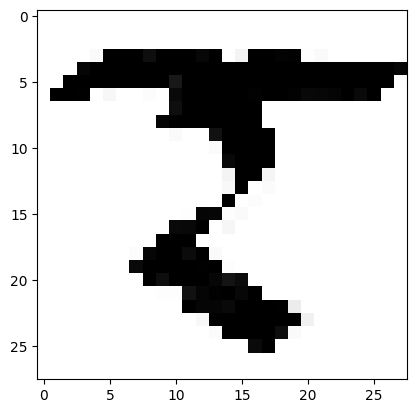

In [203]:
draw_n_guess_the_character()
